In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import defaultdict
import json

In [33]:
df = pd.read_json('dataset/full_train_dataset.json',orient='records')
df.head()

,tag_string_general,has_visible_children,has_large,tag_count_meta,bit_flags,has_active_children,preview_file_url,image_width,updated_at,tag_string_artist,...,file_ext,last_commented_at,last_comment_bumped_at,parent_id,approver_id,pixiv_id,last_noted_at,prompt_string,prompt_format_id,caption_string
0,1girl areola_slip areolae arm_under_breasts ba...,False,0.0,1,2,False,https://cdn.donmai.us/preview/cd/99/cd9918b473...,778,2021-12-11 19:37:27.451000+00:00,inoue_takuya_(tactactak),...,jpg,NaT,NaT,NaN,131474.0,75772220.0,NaT,Reply with an eloquent caption based on all th...,0,"""Through the skilled hands of artist inoue_tak..."
1,2girls blue_eyes blue_hair hat multiple_girls ...,False,0.0,1,0,False,https://cdn.donmai.us/preview/0d/c1/0dc1e76d97...,600,2021-07-15 18:21:13.327000+00:00,yuzuki_(yuduame),...,jpg,NaT,NaT,NaN,NaN,2658681.0,NaT,Reply with a concise description of an artwork...,1,"The artwork features two girls, Cirno and Lett..."
2,2girls blurry bug butterfly cherry_blossoms de...,False,0.0,2,0,False,https://cdn.donmai.us/preview/07/bd/07bdb85252...,700,2021-08-30 09:34:50.982000+00:00,tokoroten_(hmmuk),...,jpg,NaT,NaT,NaN,318380.0,39438207.0,NaT,Reply with a concise description of an artwork...,1,"The artwork features two girls, Konpaku Youmu ..."
3,1girl animal_ears bell brown_eyes brown_hair f...,False,1.0,2,0,False,https://cdn.donmai.us/preview/8b/da/8bda6612f4...,1000,2021-07-01 20:44:18.278000+00:00,neme,...,jpg,NaT,NaT,NaN,13392.0,37532574.0,NaT,Reply with a highly condensed run on sentence ...,2,Neme's artist rendition of Touhou's Futatsuiwa...
4,1girl bangs black_headwear blue_eyes blue_hair...,False,1.0,1,2,False,https://cdn.donmai.us/preview/72/bf/72bfaeb56a...,1448,2021-11-17 01:45:03.298000+00:00,osechi_(pixiv56606477),...,jpg,NaT,NaT,NaN,NaN,92667932.0,NaT,Reply with a concise description of an artwork...,1,The artwork is a portrait of Hoshimachi Suisei...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19950 entries, 0 to 19949
Data columns (total 51 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   tag_string_general      19950 non-null  object             
 1   has_visible_children    19950 non-null  bool               
 2   has_large               19892 non-null  float64            
 3   tag_count_meta          19950 non-null  int64              
 4   bit_flags               19950 non-null  int64              
 5   has_active_children     19950 non-null  bool               
 6   preview_file_url        19636 non-null  object             
 7   image_width             19950 non-null  int64              
 8   updated_at              19950 non-null  datetime64[ns, UTC]
 9   tag_string_artist       19950 non-null  object             
 10  tag_count               19950 non-null  int64              
 11  is_status_locked        19950 non-null  b

[Text(0.5, 1.0, 'caption length distribution (whitespace)')]

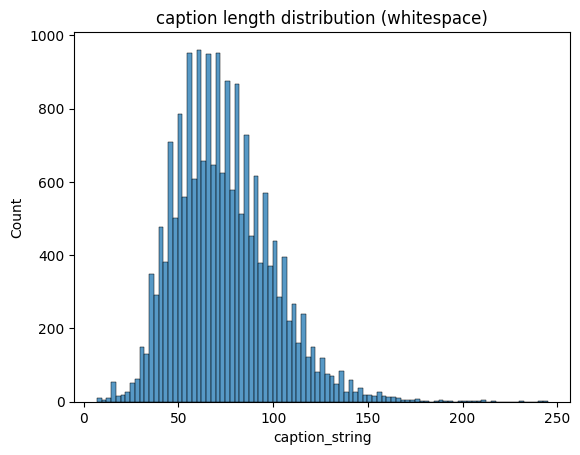

In [36]:
sns.histplot(data=df.caption_string.str.split().apply(len)).set(title='caption length distribution (whitespace)')

In [37]:
from collections import defaultdict
import pandas as pd


def count_tags(df):
    tag_counts = defaultdict(lambda: {'post_count': 0, 'category': ''})
    category_map = {'tag_string_general': 'general', 
                    'tag_string_copyright': 'copyright', 
                    'tag_string_character': 'character', 
                    'tag_string_meta': 'meta', 
                    'tag_string_artist': 'artist'}
    for _, row in df.iterrows():
        for col in category_map:
            tags = row[col].split()
            for tag in tags:
                tag_counts[tag]['post_count'] += 1
                tag_counts[tag]['category'] = category_map[col]
    return tag_counts


def create_df(tag_counts):
    tag_df = pd.DataFrame.from_dict(tag_counts, orient='index')
    tag_df.index.name = 'name'
    tag_df = tag_df.sort_values('post_count', ascending=False)
    tag_df = tag_df.reset_index()
    return tag_df

In [38]:
tag_counts = count_tags(df)
tag_df = create_df(tag_counts)
tag_df

,name,post_count,category
0,1girl,14090,general
1,commentary_request,11825,meta
2,solo,11646,general
3,long_hair,10299,general
4,highres,10249,meta
...,...,...,...
39783,meipu_hm,1,artist
39784,mia_(fire_emblem),1,character
39785,mitani_yuuki,1,character
39786,teramoto_tomiko,1,character


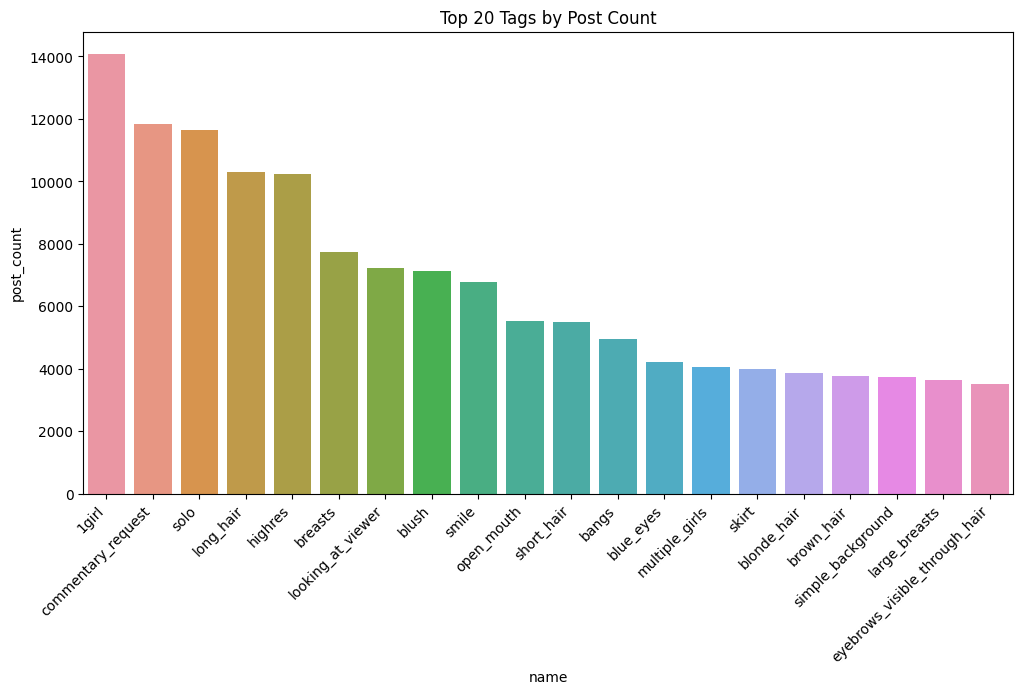

In [45]:
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='post_count', data=tag_df.head(20)).set(title='Top 20 Tags by Post Count')
plt.xticks(rotation=45, ha='right')
plt.show()

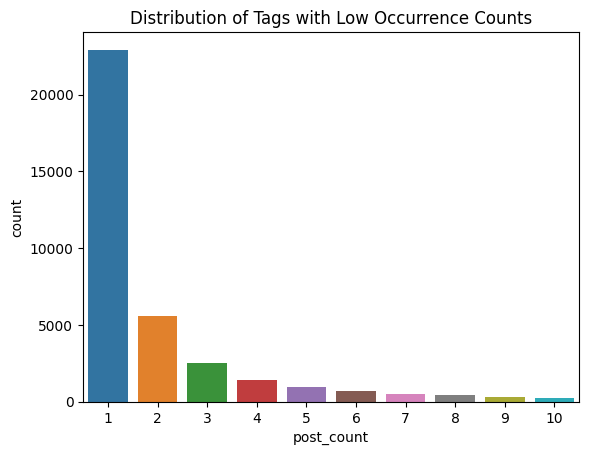

In [46]:
sns.countplot(data=tag_df[tag_df['post_count'] <= 10], x='post_count')\
   .set(title='Distribution of Tags with Low Occurrence Counts')
plt.show()

In [71]:
tag_df[tag_df["post_count"]==1].sample(10)[['name','category']]

,name,category
22505,momoko_(momoko14),artist
18789,akasaka_(qv92612),artist
19762,microsoft,copyright
19332,decidueye,character
32585,16400526,artist
31179,military_rank_insignia,general
33944,hyottoko_(rurouni_kenshin),character
24546,moni158,artist
17844,mogskg,artist
39141,hishou_kotatsu,artist


In [125]:
tag_df[tag_df["post_count"]==1]['category'].value_counts()

artist       10356
character     6689
general       4337
copyright     1507
meta            38
Name: category, dtype: int64

Now that's a lotta low occurence tags. They're mostly very niche things. Let's prune it down to the tags that actually prevalent on danbooru, and are therefore, more impactful in image generation.
Also, let's exclude the metadata tags, since they don't contribute to the image generation and aren't included in the captions in the first place.

Example meta tags: commentary_request, translated, bad_pixiv_id, jpeg_artifacts

Who cares? They muddle up the caption with unrealistic details as well.

In [59]:
full_tag_df = pd.read_json(
    r"danbooru2021\tags000000000000.json", orient="records", lines=True
)
lookup = {0: "general", 1: "artist", 3: "copyright", 4: "characters", 5: "meta"} # what happened to 2??
full_tag_df["category"] = full_tag_df["category"].map(lookup)
full_tag_df

,updated_at,is_locked,name,category,created_at,post_count,id
0,2019-09-02 11:28:03.321000+00:00,False,midori,general,2013-02-28 17:07:15.609000+00:00,0,9
1,2019-09-01 22:29:49.259000+00:00,False,yukari,general,2013-02-28 19:21:47.082000+00:00,0,31
2,2020-08-14 12:06:59.236000+00:00,False,os,general,2013-02-28 21:18:48.041000+00:00,0,36
3,2019-09-02 16:09:04.735000+00:00,False,manga,general,2013-02-28 01:39:36.557000+00:00,0,45
4,2019-09-02 04:14:49.391000+00:00,False,sakuya,general,2013-02-28 20:09:51.819000+00:00,0,71
...,...,...,...,...,...,...,...
953654,2019-09-01 17:57:36.517000+00:00,False,commissioner_upload,meta,2018-10-15 23:51:41.711000+00:00,1788,1496610
953655,2019-08-31 02:27:39.116000+00:00,False,colorized,meta,2017-12-24 19:43:16.781000+00:00,7932,514234
953656,2019-08-28 11:37:40.821000+00:00,False,game_cg,meta,2013-02-28 17:02:51.989000+00:00,43772,8066
953657,2019-09-02 13:50:13.715000+00:00,False,reward_available,meta,2017-12-25 11:50:42.823000+00:00,6398,1452451


This dataset has almost a million tags! However, most of them are deprecated and have 0 posts associated with it lol. Lets use 500 posts as a cutoff point (a similar project used 600)
[SmilingWolf/wd-v1-4-convnext-tagger-v2](https://huggingface.co/SmilingWolf/wd-v1-4-convnext-tagger-v2)

In [66]:
full_tag_df[full_tag_df['post_count'] == 0]

,updated_at,is_locked,name,category,created_at,post_count,id
0,2019-09-02 11:28:03.321000+00:00,False,midori,general,2013-02-28 17:07:15.609000+00:00,0,9
1,2019-09-01 22:29:49.259000+00:00,False,yukari,general,2013-02-28 19:21:47.082000+00:00,0,31
2,2020-08-14 12:06:59.236000+00:00,False,os,general,2013-02-28 21:18:48.041000+00:00,0,36
3,2019-09-02 16:09:04.735000+00:00,False,manga,general,2013-02-28 01:39:36.557000+00:00,0,45
4,2019-09-02 04:14:49.391000+00:00,False,sakuya,general,2013-02-28 20:09:51.819000+00:00,0,71
...,...,...,...,...,...,...,...
953262,2021-09-15 20:24:35.756000+00:00,False,animated_doujin,meta,2021-09-15 20:24:35.756000+00:00,0,1693258
953263,2021-10-03 04:59:07.811000+00:00,False,check_bird,meta,2021-10-03 04:59:07.811000+00:00,0,1699377
953264,2021-10-23 18:55:39.754000+00:00,False,foundation_sample,meta,2021-10-23 18:55:39.754000+00:00,0,1706290
953265,2021-10-28 18:31:06.641000+00:00,False,60_fps,meta,2021-10-28 18:31:06.641000+00:00,0,1708986


In [60]:
reduced_tag_df = full_tag_df[
    (full_tag_df["post_count"] >= 500) & (full_tag_df["category"] != "meta")
].sort_values("post_count", ascending=False)
reduced_tag_df

,updated_at,is_locked,name,category,created_at,post_count,id
423668,2019-12-27 00:19:43.276000+00:00,False,1girl,general,2013-02-28 03:39:31.882000+00:00,3569919,470575
404627,2019-12-27 00:20:15.092000+00:00,False,solo,general,2013-02-28 16:42:53.574000+00:00,2946330,212816
418361,2019-08-27 00:40:54.525000+00:00,False,long_hair,general,2013-02-28 05:04:36.440000+00:00,2506393,13197
423348,2019-08-27 20:54:38.246000+00:00,False,breasts,general,2013-02-28 04:44:05.108000+00:00,1894136,8601
421755,2019-12-27 00:19:45.849000+00:00,False,blush,general,2013-02-28 16:34:19.520000+00:00,1715415,3389
...,...,...,...,...,...,...,...
952744,2019-09-02 08:13:50.845000+00:00,False,sazaki_kaoruko,characters,2014-10-02 19:28:43.325000+00:00,500,1291870
759383,2019-09-01 20:39:30.597000+00:00,False,gundam_g_no_reconguista,copyright,2014-10-11 22:48:20.184000+00:00,500,1292817
759382,2019-09-02 08:53:18.934000+00:00,False,sakura_trick,copyright,2013-02-28 01:13:26.956000+00:00,500,723747
720228,2019-09-02 13:00:11.107000+00:00,False,mossi,artist,2014-03-12 20:38:27.433000+00:00,500,1267737


In [81]:
tag_list = reduced_tag_df['name'].reset_index(drop=True)

# Filter the DataFrame to include only rows where the 'name' column is in the list of wanted tags
tag_df_filtered = tag_df[tag_df["name"].isin(tag_list)]

# Convert the 'name' column to a Categorical data type with the categories in 'all_tags'
tag_df_filtered = tag_df_filtered.assign(name=pd.Categorical(tag_df_filtered['name'], categories=tag_list))

# Sort the filtered DataFrame by the 'name' column and reset the index
tag_df_filtered = tag_df_filtered.sort_values("name").reset_index(drop=True)
tag_df_filtered

,name,post_count,category
0,1girl,14090,general
1,solo,11646,general
2,long_hair,10299,general
3,breasts,7752,general
4,blush,7129,general
...,...,...,...
11081,falken_(yutozin),1,artist
11082,sazaki_kaoruko,2,character
11083,gundam_g_no_reconguista,2,copyright
11084,mossi,3,artist


<AxesSubplot: xlabel='post_count', ylabel='Count'>

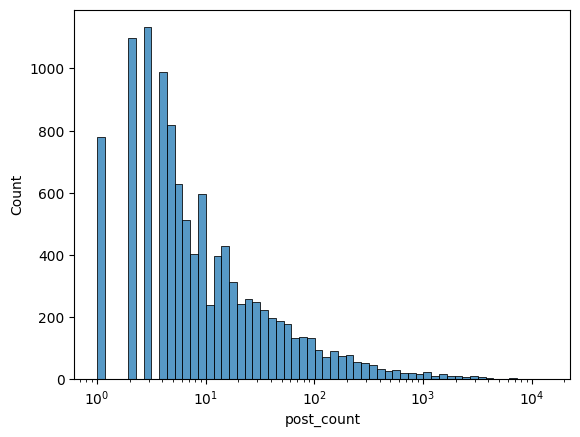

In [64]:
sns.histplot(data=tag_df_filtered,x='post_count',log_scale=True)

Yeah, it's still terribly imbalanced. I know. Some of the tags in the tag_list don't even appear in the train data. That's how it's always going to be with danbooru. 1girl or long_hair will always be more popular than some obscure artist's name

## Let's now analyze the processed dataset

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns

In [10]:
df = pd.read_json('dataset/train_data.json',orient='records')
tag_list = open(r'dictionaries/tag_dict.txt').read().splitlines()
df

,caption_string,tag_string
0,"""Through the skilled hands of artist inoue_tak...","1girl, areola_slip, areolae, arm_under_breasts..."
1,"The artwork features two girls, Cirno and Lett...","2girls, blue_eyes, blue_hair, cirno, hat, lett..."
2,"The artwork features two girls, Konpaku Youmu ...","2girls, blurry, bug, butterfly, cherry_blossom..."
3,Neme's artist rendition of Touhou's Futatsuiwa...,"1girl, animal_ears, bell, brown_eyes, brown_ha..."
4,The artwork is a portrait of Hoshimachi Suisei...,"1girl, bangs, black_headwear, blue_eyes, blue_..."
...,...,...
19945,The artwork by 05tom16 features six girls from...,"6+girls, ahoge, aqua_hair, bandages, black_hai..."
19946,The artwork features the character Shiragiku H...,"1girl, arms_up, backlighting, bangs, black_hai..."
19947,"With her sultry gaze and captivating curves, S...","1girl, breasts, cleavage, greyscale, headphone..."
19948,Masayo (Gin no Ame) depicts Kuma (Kantai Colle...,"1girl, :d, ahoge, alternate_costume, animal_ea..."


In [4]:
df['tags'] = df['tag_string'].str.split(', ')

In [5]:
from sklearn import preprocessing
mlb = preprocessing.MultiLabelBinarizer(classes=tag_list)
mlb.fit([list(tag_list)])
one_hots = pd.DataFrame(mlb.transform(df['tags']),columns=mlb.classes_, index=df.index)
one_hots

,1girl,solo,long_hair,breasts,blush,looking_at_viewer,smile,short_hair,open_mouth,bangs,...,chrysanthemum,pitcher,sunhyun,holding_ladle,falken_(yutozin),sazaki_kaoruko,gundam_g_no_reconguista,sakura_trick,mossi,nanashino
0,1,1,0,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19945,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
19946,1,1,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
19947,1,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
19948,1,1,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
corr_coef = np.corrcoef(one_hots.T)

c:\Users\panta\anaconda3\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\panta\anaconda3\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [13]:
corr_coef

array([[ 1.00000000e+00,  5.81995002e-01,  7.31501493e-02, ...,
                    nan, -1.06621459e-03,  4.56596677e-03],
       [ 5.81995002e-01,  1.00000000e+00,  3.11047388e-02, ...,
                    nan,  2.06264874e-03,  5.97853412e-03],
       [ 7.31501493e-02,  3.11047388e-02,  1.00000000e+00, ...,
                    nan, -4.48861142e-03,  6.85374692e-03],
       ...,
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-1.06621459e-03,  2.06264874e-03, -4.48861142e-03, ...,
                    nan,  1.00000000e+00, -8.68282941e-05],
       [ 4.56596677e-03,  5.97853412e-03,  6.85374692e-03, ...,
                    nan, -8.68282941e-05,  1.00000000e+00]])

<AxesSubplot: ylabel='Density'>

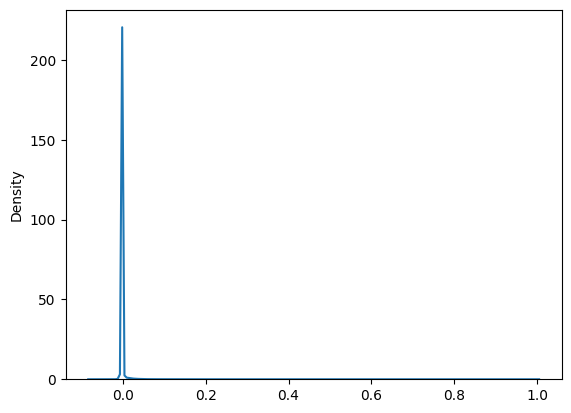

In [20]:
sns.kdeplot(data=np.random.choice(np.nan_to_num(corr_coef.flatten()), size=100000))

In [34]:
def find_correlations_within_range(
    corr_coef, correlation_range, one_hots, print_corrs=True
):
    corr_coef = np.nan_to_num(corr_coef)
    row_idx, col_idx = np.triu_indices_from(corr_coef, k=1)
    corr_values = corr_coef[row_idx, col_idx]
    within_range = np.logical_and(
        corr_values >= correlation_range[1], corr_values < correlation_range[0]
    )
    corrs = [
        (one_hots.columns[i], one_hots.columns[j], corr_coef[i, j])
        for i, j in zip(row_idx[within_range], col_idx[within_range])
    ]
    top_corrs = sorted(corrs, key=lambda x: x[2], reverse=True)

    if print_corrs:
        for i, (col1, col2, corr) in enumerate(top_corrs):
            print(f"{i+1}. {col1} - {col2}: {corr:.3f}")
    else:
        return top_corrs

In [37]:
find_correlations_within_range(corr_coef, (0.99, 0.9), one_hots)

1. nier_(series) - nier_automata: 0.987
2. layered_sleeves - short_over_long_sleeves: 0.982
3. oda_nobunaga_(fate) - oda_nobunaga_(koha/ace): 0.972
4. hakama - hakama_skirt: 0.970
5. no_headwear - no_hat: 0.969
6. gradient - gradient_background: 0.968
7. pervert - female_pervert: 0.967
8. stuffed_toy - stuffed_animal: 0.962
9. kirby_(series) - kirby: 0.957
10. watashi_ga_motenai_no_wa_dou_kangaetemo_omaera_ga_warui! - kuroki_tomoko: 0.957
11. print_bow - print_bowtie: 0.957
12. silk - spider_web: 0.953
13. mechanical_horns - frankenstein's_monster_(fate): 0.953
14. joseph_joestar - joseph_joestar_(young): 0.953
15. egg_(food) - fried_egg: 0.949
16. odin_sphere - gwendolyn_(odin_sphere): 0.949
17. medusa_(fate) - medusa_(rider)_(fate): 0.949
18. cardcaptor_sakura - kinomoto_sakura: 0.949
19. sandwiched - girl_sandwich: 0.949
20. jaguar_ears - jaguar_(kemono_friends): 0.943
21. tomoe_(symbol) - mitsudomoe_(shape): 0.943
22. oshiro_project - oshiro_project_re: 0.943
23. phantasy_star - ph